# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('demo01.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

Vamos analisar as variáveis do nosso conjunto de dados

In [4]:
# Verificando valores NA
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [5]:
# Distribuição da variável 'mau'
df['mau'].value_counts()

mau
False    16260
True       390
Name: count, dtype: int64

<Axes: >

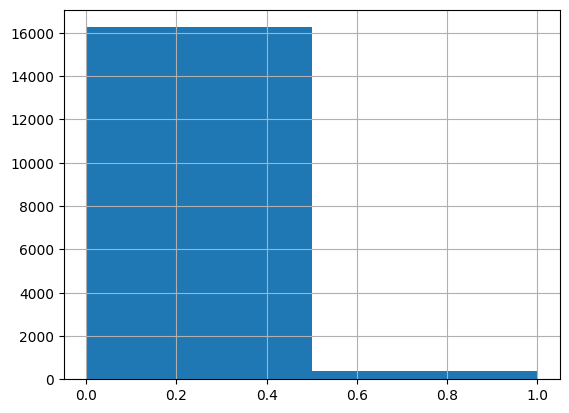

In [6]:
df['mau'].astype(int).hist(bins=2)

In [7]:
colunas_object = df.select_dtypes(include='object').columns.to_list()
colunas_object

['sexo',
 'posse_de_veiculo',
 'posse_de_imovel',
 'tipo_renda',
 'educacao',
 'estado_civil',
 'tipo_residencia']

In [8]:
# contagem de valores únicos
for c in colunas_object:
    print(df[c].value_counts())
    print('\n')

sexo
F    11201
M     5449
Name: count, dtype: int64


posse_de_veiculo
N    10178
Y     6472
Name: count, dtype: int64


posse_de_imovel
Y    11176
N     5474
Name: count, dtype: int64


tipo_renda
Working                 8565
Commercial associate    3826
Pensioner               2800
State servant           1451
Student                    8
Name: count, dtype: int64


educacao
Secondary / secondary special    11245
Higher education                  4551
Incomplete higher                  649
Lower secondary                    188
Academic degree                     17
Name: count, dtype: int64


estado_civil
Married                 11680
Single / not married     2035
Civil marriage           1283
Separated                 945
Widow                     707
Name: count, dtype: int64


tipo_residencia
House / apartment      14974
With parents             738
Municipal apartment      520
Rented apartment         227
Office apartment         120
Co-op apartment           71
Name: count, dt

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [9]:
meta_dados = pd.DataFrame({
    'Coluna': df.columns,
    'Tipo': df.dtypes,
    'QtdCategorias': df.apply(lambda x: x.nunique())
})
meta_dados

,Coluna,Tipo,QtdCategorias
sexo,sexo,object,2
posse_de_veiculo,posse_de_veiculo,object,2
posse_de_imovel,posse_de_imovel,object,2
qtd_filhos,qtd_filhos,int64,8
tipo_renda,tipo_renda,object,5
educacao,educacao,object,5
estado_civil,estado_civil,object,5
tipo_residencia,tipo_residencia,object,6
idade,idade,float64,5298
tempo_emprego,tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [16]:
df_with_dummies = pd.get_dummies(df, 
                                 columns=['sexo', 
                                          'posse_de_veiculo', 
                                          'posse_de_imovel', 
                                          'tipo_renda', 
                                          'educacao', 
                                          'estado_civil', 
                                          'tipo_residencia'], 
                                 drop_first=True)
df_with_dummies.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [20]:
tb_cruzada_email_mau = pd.crosstab(df['possui_email'], df['mau'])
tb_cruzada_email_mau

mau,False,True
possui_email,,
0,14810,360
1,1450,30


In [21]:
tb_cruzada_veiculo_mau = pd.crosstab(df['posse_de_veiculo'], df['mau'])
tb_cruzada_veiculo_mau

mau,False,True
posse_de_veiculo,,
N,9931,247
Y,6329,143


A variável 'possue_email' parece prever melhor a categoria 'mau'=1, apesar desta análise não indicar causalidade.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [22]:
df_with_dummies.to_csv('df_with_dummies.csv')